# Chapter 1

## Growth and Rate of Return
Growth and Rate of Return are two concepts that are ubiquitous throughout the financial world. Recall that the cumulative returns from investing $100 in an asset that grows at 5% per year, over a 2 year period can be calculated as:

100∗(1+0.05)2

## Compound Interest
As you saw in the previous exercise, both time and the rate of return are very important variables when forecasting the future value of an investment.

Another important variable is the number of compounding periods, which can greatly affect compounded returns over time.

In [1]:
# Predefined variables
initial_investment = 100
growth_periods = 30
growth_rate = 0.06

# Calculate the value for the investment compounded once per year
compound_periods_1 = 1
investment_1 = initial_investment*(1 + growth_rate / compound_periods_1)**(compound_periods_1*growth_periods)
print("Investment 1: " + str(round(investment_1, 2)))

# Calculate the value for the investment compounded quarterly
compound_periods_2 = 4
investment_2 = initial_investment*(1 + growth_rate / compound_periods_2)**(compound_periods_2*growth_periods)
print("Investment 2: " + str(round(investment_2, 2)))

# Calculate the value for the investment compounded monthly
compound_periods_3 = 12
investment_3 = initial_investment*(1 + growth_rate / compound_periods_3)**(compound_periods_3*growth_periods)

print("Investment 3: " + str(round(investment_3, 2)))

Investment 1: 574.35
Investment 2: 596.93
Investment 3: 602.26


## Discount Factors and Depreciation
Unfortunately, not everything grows in value over time.

In fact, many assets depreciate, or lose value over time. To simulate this, you can simply assume a negative expected rate of return.

Example:

Calculate the final depreciated value of an initially $10,000 car which declines in value by 3% per year for 10 years:

$10,000∗(1+−0.03)10=$7,374.24

In [2]:
# Calculate the future value
initial_investment = 100
growth_rate = -0.05
growth_periods = 10
future_value = initial_investment*(1 + growth_rate)**(growth_periods)
print("Future value: " + str(round(future_value, 2)))

# Calculate the discount factor
discount_factor = 1/((1 + growth_rate)**(growth_periods))
print("Discount factor: " + str(round(discount_factor, 2)))

# Derive the initial value of the investment
initial_investment_again = future_value * discount_factor
print("Initial value: " + str(round(initial_investment_again, 2)))

Future value: 59.87
Discount factor: 1.67
Initial value: 100.0


## Present Value
Luckily for you, there is a module called numpy which contains many functions which will make your life much easier when working with financial values.

The .pv(rate, nper, pmt, fv) function, for example, allows you to calculate the present value of an investment as before with a few simple parameters:

rate: The rate of return of the investment
nper: The lifespan of the investment
pmt: The (fixed) payment at the beginning or end of each period (which is 0 in our example)
fv: The future value of the investment
You can use this formula in many ways. For example, you can calculate the present value of future investments in today's dollars.

In [3]:
# Import numpy as np
import numpy as np

# Calculate investment_1
investment_1 = np.pv(rate=0.03, nper=15, pmt=0, fv=10000)

# Note that the present value returned is negative, so we multiply the result by -1
print("Investment 1 is worth " + str(round(-investment_1, 2)) + " in today's dollars")

# Calculate investment_2
investment_2 = np.pv(rate=0.05, nper=10, pmt=0, fv=10000)

print("Investment 2 is worth " + str(round(-investment_2, 2)) + " in today's dollars")

Investment 1 is worth 6418.62 in today's dollars
Investment 2 is worth 6139.13 in today's dollars


<ipython-input-3-2fc591020d0c>:5: DeprecationWarning: numpy.pv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pv instead (https://pypi.org/project/numpy-financial/).
  investment_1 = np.pv(rate=0.03, nper=15, pmt=0, fv=10000)
<ipython-input-3-2fc591020d0c>:11: DeprecationWarning: numpy.pv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pv instead (https://pypi.org/project/numpy-financial/).
  investment_2 = np.pv(rate=0.05, nper=10, pmt=0, fv=10000)


## Future Value
The numpy module also contains a similar function, .fv(rate, nper, pmt, pv), which allows you to calculate the future value of an investment as before with a few simple parameters:

rate: The rate of return of the investment
nper: The lifespan of the investment
pmt: The (fixed) payment at the beginning or end of each period (which is 0 in our example)
pv: The present value of the investment
It is important to note that in this function call, you must pass a negative value into the pv parameter if it represents a negative cash flow (cash going out). In other words, if you were to compute the future value of an investment, requiring an up-front cash payment, you would need to pass a negative value to the pv parameter in the .fv() function.

In [4]:
import numpy as np

# Calculate investment_1
investment_1 = np.fv(rate=0.05, nper=15, pmt=0, pv=-10000)
print("Investment 1 will yield a total of $" + str(round(investment_1, 2)) + " in 15 years")

# Calculate investment_2
investment_2 = np.fv(rate=0.08, nper=15, pmt=0, pv=-10000)
print("Investment 2 will yield a total of $" + str(round(investment_2, 2)) + " in 15 years")

Investment 1 will yield a total of $20789.28 in 15 years
Investment 2 will yield a total of $31721.69 in 15 years


<ipython-input-4-a8f913193ef0>:4: DeprecationWarning: numpy.fv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.fv instead (https://pypi.org/project/numpy-financial/).
  investment_1 = np.fv(rate=0.05, nper=15, pmt=0, pv=-10000)
<ipython-input-4-a8f913193ef0>:8: DeprecationWarning: numpy.fv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.fv instead (https://pypi.org/project/numpy-financial/).
  investment_2 = np.fv(rate=0.08, nper=15, pmt=0, pv=-10000)


## Adjusting Future Values for Inflation
You can now put together what you learned in the previous exercises by following a simple methodology:

First, forecast the future value of an investment given a rate of return
Second, discount the future value of the investment by a projected inflation rate
The methodology above will use both the .fv() and .pv() functions to arrive at the projected value of a given investment in today's dollars, adjusted for inflation.

In [5]:
import numpy as np

# Calculate investment_1
investment_1 = np.fv(rate=0.08, nper=10, pmt=0, pv=-10000)
print("Investment 1 will yield a total of $" + str(round(investment_1, 2)) + " in 10 years")

# Calculate investment_2
investment_1_discounted = np.pv(rate=0.03, nper=10, pmt=0, fv=investment_1)
print("After adjusting for inflation, investment 1 is worth $" + str(round(-investment_1_discounted, 2)) + " in today's dollars")

Investment 1 will yield a total of $21589.25 in 10 years
After adjusting for inflation, investment 1 is worth $16064.43 in today's dollars


<ipython-input-5-4a445b845b0d>:4: DeprecationWarning: numpy.fv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.fv instead (https://pypi.org/project/numpy-financial/).
  investment_1 = np.fv(rate=0.08, nper=10, pmt=0, pv=-10000)
<ipython-input-5-4a445b845b0d>:8: DeprecationWarning: numpy.pv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pv instead (https://pypi.org/project/numpy-financial/).
  investment_1_discounted = np.pv(rate=0.03, nper=10, pmt=0, fv=investment_1)


## Discounting Cash Flows
You can use numpy's net present value function numpy.npv(rate, values) to calculate the net present value of a series of cash flows. You can create these cash flows by using a numpy.array([...]) of values.

Compute the NPV of the same cash flows from the following project, but assuming different discount rates:

Year	Cash Flow

1	100

2	100

3	100

4	100

5	100


In [6]:
import numpy as np

# Predefined array of cash flows
cash_flows = np.array([100, 100, 100, 100, 100])

# Calculate investment_1
investment_1 = np.npv(rate=0.03, values=cash_flows)
print("Investment 1's net present value is $" + str(round(investment_1, 2)) + " in today's dollars")

# Calculate investment_2
investment_2 = np.npv(rate=0.05, values=cash_flows)
print("Investment 2's net present value is $" + str(round(investment_2, 2)) + " in today's dollars")

# Calculate investment_3
investment_3 = np.npv(rate=0.07, values=cash_flows)
print("Investment 3's net present value is $" + str(round(investment_3, 2)) + " in today's dollars")

Investment 1's net present value is $471.71 in today's dollars
Investment 2's net present value is $454.6 in today's dollars
Investment 3's net present value is $438.72 in today's dollars


<ipython-input-6-59d6ec6a4e98>:7: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  investment_1 = np.npv(rate=0.03, values=cash_flows)
<ipython-input-6-59d6ec6a4e98>:11: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  investment_2 = np.npv(rate=0.05, values=cash_flows)
<ipython-input-6-59d6ec6a4e98>:15: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  investment_3 = np.npv(rate=0.07, values=cash_flows)


## Initial Project Costs
The numpy.npv(rate, values) function is very powerful because it allows you to pass in both positive and negative values.

For this exercise, you will calculate the net present value of two potential projects with different cash flows:

Year	Project 1	Project 2

1	-250 (initial investment)	-250 (initial investment)

2	100 cash flow	300 cash flow

3	200 cash flow	-250 (net investment)

4	300 cash flow	300 cash flow

5	400 cash flow	300 cash flow

In this example, project 1 only requires an initial investment of 250, generating a slowly increasing series of cash flows over the next 4 years.

Project 2, on the other hand, requires an initial investment of 250 and an additional investment of 250 in year 3. However, project 2 continues to generate larger cash flows.

Assuming both projects don't generate any more cash flows after the fifth year, which project would you decide to undertake? The best way to decide is by comparing the NPV of both projects.

In [7]:
import numpy as np

# Create an array of cash flows for project 1
cash_flows_1 = np.array([-250,100,200,300,400])

# Create an array of cash flows for project 2
cash_flows_2 = np.array([-250,300,-250,300,300])

# Calculate the net present value of project 1
investment_1 = np.npv(rate=0.03, values=cash_flows_1)
print("The net present value of Investment 1 is worth $" + str(round(investment_1, 2)) + " in today's dollars")

# Calculate the net present value of project 2
investment_2 = np.npv(rate=0.03, values=cash_flows_2)
print("The net present value of Investment 2 is worth $" + str(round(investment_2, 2)) + " in today's dollars")

The net present value of Investment 1 is worth $665.54 in today's dollars
The net present value of Investment 2 is worth $346.7 in today's dollars


<ipython-input-7-877b01718c0d>:10: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  investment_1 = np.npv(rate=0.03, values=cash_flows_1)
<ipython-input-7-877b01718c0d>:14: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  investment_2 = np.npv(rate=0.03, values=cash_flows_2)


# Diminishing Cash Flows
Remember how compounded returns grow rapidly over time? Well, it works in the reverse, too. Compounded discount factors over time will quickly shrink a number towards zero.

For example, 100 at a 3% annual discount for 1 year is still worth roughly 97.08:

Value(1+Discount Rate)# of Discount Periods=100(1+0.03)1= 97.08 
But this number shrinks quite rapidly as the number of discounting periods increases:

100/(1+0.03)^5= /86.26 

100/(1+0.03)^10= 74.41 

This means that the longer in the future your cash flows will be received (or paid), the close to 0 that number will be.

In [8]:
import numpy as np

# Calculate investment_1
investment_1 = np.pv(rate=0.03, nper=30, pmt=0, fv=100)
print("Investment 1 is worth $" + str(round(-investment_1, 2)) + " in today's dollars")

# Calculate investment_2
investment_2 = np.pv(rate=0.03, nper=50, pmt=0, fv=100)
print("Investment 2 is worth $" + str(round(-investment_2, 2)) + " in today's dollars")

# Calculate investment_3
investment_3 = np.pv(rate=0.03, nper=100, pmt=0, fv=100)
print("Investment 3 is worth $" + str(round(-investment_3, 2)) + " in today's dollars")

Investment 1 is worth $41.2 in today's dollars
Investment 2 is worth $22.81 in today's dollars
Investment 3 is worth $5.2 in today's dollars


<ipython-input-8-94df784e688e>:4: DeprecationWarning: numpy.pv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pv instead (https://pypi.org/project/numpy-financial/).
  investment_1 = np.pv(rate=0.03, nper=30, pmt=0, fv=100)
<ipython-input-8-94df784e688e>:8: DeprecationWarning: numpy.pv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pv instead (https://pypi.org/project/numpy-financial/).
  investment_2 = np.pv(rate=0.03, nper=50, pmt=0, fv=100)
<ipython-input-8-94df784e688e>:12: DeprecationWarning: numpy.pv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pv instead (https://pypi.org/project/numpy-financial/).
  investment_3 = np.pv(rate=0.03, nper=100, pmt=0, fv=100)


# Chapter 2

## Project Proposals and Cash Flows Projections
Your project managers have projected the cash flows for each of the proposals.

Project 1 provides higher short term cash flows, but Project 2 becomes more profitable over time.

The cash flow projections for both projects are as follows:

Note: The projections are provided in thousands. For example, 1,000 = 1,000,000. We will use the smaller denominations to make everything easier to read. This is also commonly done in financial statements with thousands or even millions in order to represent millions or billions.

In [9]:
import numpy as np

# Create a numpy array of cash flows for Project 1
cf_project_1 = np.array([-1000,200,250,300,350,400,450,500,550,600])

# Create a numpy array of cash flows for Project 2
cf_project_2 = np.array([-1000,150,225,300,375,425,500,575,600,625])

# Scale the original objects by 1000x
cf_project1 = cf_project_1 * 1000
cf_project2 = cf_project_2 * 1000

## Internal Rate of Return
Now that you have the cash flow projections ready to go for each project, you want to compare the internal rate of return (IRR) of each project to help you decide which project would be most beneficial for your company in terms of yield (rate of return). In this exercise, you will calculate the internal rate of return for each project using np.irr(values).

The cash flows for projects 1 and 2 are available as cf_project1 and cf_project2.

In [10]:

import numpy as np

# Calculate the internal rate of return for Project 1
irr_project1 = np.irr(cf_project1)
print("Project 1 IRR: " + str(round(100*irr_project1, 2)) + "%")

# Calculate the internal rate of return for Project 2
irr_project2 = np.irr(cf_project2)
print("Project 2 IRR: " + str(round(100*irr_project2, 2)) + "%")

Project 1 IRR: 28.92%
Project 2 IRR: 28.78%


<ipython-input-10-e9bfae0e069c>:4: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  irr_project1 = np.irr(cf_project1)
<ipython-input-10-e9bfae0e069c>:8: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  irr_project2 = np.irr(cf_project2)


## Debt and Equity Financing
In the previous chapter, you were able to assume that your discount rate for the NPV calculation was solely based on a measure such as inflation.

However, in this chapter, you are the CEO of a new company that has outstanding debt and financing costs, which you will have to adjust for.

You will use the WACC as your discount rate in upcoming exercises.

For this exercise, assume you take out a 1,000,000 loan to finance the project, which will be your company's only outstanding debt. This loan will represent 50% of your company's total financing of 2,000,000. The remaining funding comes from the market value of equity.

In [11]:
# Set the market value of debt
mval_debt = 1000000

# Set the market value of equity
mval_equity = 1000000

# Compute the total market value of your company's financing
mval_total = mval_debt + mval_equity

# Compute the proportion of your company's financing via debt
percent_debt = 0.5
print("Debt Financing: " + str(round(100*percent_debt, 2)) + "%")

# Compute the proportion of your company's financing via equity
percent_equity = 0.5
print("Equity Financing: " + str(round(100*percent_equity, 2)) + "%")

Debt Financing: 50.0%
Equity Financing: 50.0%


## Calculating WACC
In addition to determining the proportion of both equity and debt financing, you will need to estimate the cost of financing via both debt and equity in order to estimate your WACC.

The cost of debt financing can be estimated as the amount you will have to pay on a new loan. This can be estimated by looking at the interest rates of loans of similar sizes to similar companies, or could be based on previous loans your company may already have been issued.

The cost of equity financing can be estimated as the return on equity of similar companies. Calculating the return on equity is a simple accounting exercise, but all you need to know is that essentially, investors will require a rate of return that is close to what could be earned by a similar investment.

In [12]:
# The proportion of debt vs equity financing is predefined
percent_debt = 0.50
percent_equity = 0.50

# Set the cost of equity
cost_equity = 0.18

# Set the cost of debt
cost_debt = .12

# Set the corporate tax rate
tax_rate = .35

# Calculate the WACC
wacc = percent_equity * cost_equity + percent_debt*cost_debt*(1-tax_rate)
print("WACC: " + str(round(100*wacc, 2)) + "%")

WACC: 12.9%


## Comparing Project NPV with IRR
Companies use their WACC as the discount rate when calculating the net present value of potential projects.

In the same way that you discounted values by inflation in the previous chapter to account for costs over time, companies adjust the cash flows of potential projects by their cost of financing (the WACC) to account for their investor's required rate of return based on market conditions.

Now that you calculated the WACC, you can determine the net present value (NPV) of each project's cash flows. The cash flows for projects 1 and 2 are available as cf_project1 and cf_project2.

In [13]:
cf_project1 = np.array([-1000000,   200000,   250000,   300000,   350000,   400000,
         450000,   500000,   550000,   600000])

In [14]:
cf_project2 = np.array([-1000000,   150000,   225000,   300000,   375000,   425000,
         500000,   575000,   600000,   625000])

In [15]:
import numpy as np

# Set your weighted average cost of capital equal to 12.9%
wacc = 0.129

# Calculate the net present value for Project 1
npv_project1 = np.npv(wacc, cf_project1)
print("Project 1 NPV: " + str(round(npv_project1, 2)))

# Calculate the net present value for Project 2
npv_project2 = np.npv(wacc, cf_project2)
print("Project 2 NPV: " + str(round(npv_project2, 2)))

Project 1 NPV: 856073.18
Project 2 NPV: 904741.35


<ipython-input-15-63697ddce9b5>:7: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  npv_project1 = np.npv(wacc, cf_project1)
<ipython-input-15-63697ddce9b5>:11: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  npv_project2 = np.npv(wacc, cf_project2)


## Two Project With Different Lifespans
The board of the company has decided to go a different direction, involving slightly shorter term projects and lower initial investments.

Your project managers have come up with two new ideas, and projected the cash flows for each of the proposals.

Project 1 has a lifespan of 8 years, but Project 2 only has a lifespan of 7 years. Project 1 requires an initial investment of $700,000, but Project 2 only requires $400,000.

The cash flow projections for both projects are as follows:

In [16]:
import numpy as np

# Create a numpy array of cash flows for Project 1
cf_project_1 = np.array([-700,100,150,200,250,300,350,400])

# Create a numpy array of cash flows for Project 2
cf_project_2 = np.array([-400,50,100,150,200,250,300])

# Scale the original objects by 1000x
cf_project1 = cf_project_1*1000
cf_project2 =  cf_project_2*1000

## Calculating IRR and NPV With Different Project Lifespans
Now that you calculated the WACC, you can calculate and compare the IRRs and NPVs of each project.

While the IRR remains relatively comparable across projects, the NPV, on the other hand, will be much more difficult to compare given the additional year required for project 1.

Luckily, in the next exercise, we will introduce another method to compare the NPVs of the projects, but we will first need to compute the NPVs as before.

The cash flows for projects 1 and 2 are available as cf_project1 and cf_project2.

In [17]:
import numpy as np

# Calculate the IRR for Project 1
irr_project1 = np.irr(cf_project1)
print("Project 1 IRR: " + str(round(100*irr_project1, 2)) + "%")

# Calculate the IRR for Project 2
irr_project2 = np.irr(cf_project2)
print("Project 2 IRR: " + str(round(100*irr_project2, 2)) + "%")

# Set the wacc equal to 12.9%
wacc = 0.129

# Calculate the NPV for Project 1
npv_project1 = np.npv(wacc, cf_project1)
print("Project 1 NPV: " + str(round(npv_project1, 2)))

# Calculate the NPV for Project 2
npv_project2 = np.npv(wacc, cf_project2)
print("Project 2 NPV: " + str(round(npv_project2, 2)))

Project 1 IRR: 22.94%
Project 2 IRR: 26.89%
Project 1 NPV: 302744.98
Project 2 NPV: 231228.39


<ipython-input-17-c07e2698fac2>:4: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  irr_project1 = np.irr(cf_project1)
<ipython-input-17-c07e2698fac2>:8: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  irr_project2 = np.irr(cf_project2)
<ipython-input-17-c07e2698fac2>:15: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  npv_project1 = np.npv(wacc, cf_project1)
<ipython-input-17-c07e2698fac2>:19: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  npv_project2 = np.npv(wacc, cf_project2)


## Using the Equivalent Annual Annuity Approach
Since the net present values of each project are not directly comparable given the different lifespans of each project, you will have to consider a different approach.

The equivalent annual annuity (EAA) approach allows us to compare two projects by essentially assuming that each project is an investment generating a flat interest rate each year (an annuity), and calculating the annual payment you would receive from each project, discounted to present value.

You can compute the EAA of each project using the .pmt(rate, nper, pv, fv) function in numpy.

The weighted average cost is available as wacc, and the net present values for projects 1 and 2 are available as npv_project1 and npv_project2.

In [18]:
import numpy as np

# Calculate the EAA for Project 1
eaa_project1 = np.pmt(rate=wacc, nper=8, pv=npv_project1, fv=0)
print("Project 1 EAA: " + str(round(eaa_project1, 2)))

# Calculate the EAA for Project 2
eaa_project2 = np.pmt(rate=wacc, nper=7, pv=npv_project2, fv=0)
print("Project 2 EAA: " + str(round(eaa_project2, 2)))

Project 1 EAA: -62872.2
Project 2 EAA: -52120.61


<ipython-input-18-e1f0023ef2d3>:4: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).
  eaa_project1 = np.pmt(rate=wacc, nper=8, pv=npv_project1, fv=0)
<ipython-input-18-e1f0023ef2d3>:8: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).
  eaa_project2 = np.pmt(rate=wacc, nper=7, pv=npv_project2, fv=0)


# Chapter 3

## Taking Out a Mortgage Loan
You're expecting a child soon, and its time to start looking for a home.

You're currently living out of an apartment in New York City, but your blossoming career as a Data Scientist has allowed you to save up a sizable sum and purchase a home in neighboring Hoboken, New Jersey.

You have decided to purchase a beautiful brownstone home in the $800,000 range. While you do have a considerable amount of cash on hand, you don't have enough to purchase the entire home outright, which means you will have to take the remaining balance out as a mortgage loan. From the sound of it, you'll have to put about 20% down up-front to a mortgage loan of that size.

This up-front payment is known as a down payment.

In [25]:
import numpy as np

# Set the value of the home you are looking to buy
home_value = 800000

# What percentage are you paying up-front?
down_payment_percent = 0.5

# Calculate the dollar value of the down payment
down_payment = down_payment_percent * home_value
print("Initial Down Payment: " + str(down_payment))

# Calculate the value of the mortgage loan required after the down payment
mortgage_loan = home_value - down_payment
print("Mortgage Loan: " + str(mortgage_loan))

Initial Down Payment: 400000.0
Mortgage Loan: 400000.0


## Calculating the Monthly Mortgage Payment
In order to make sure you can afford the home, you will have to calculate the monthly mortgage payment you will have to make on a loan that size.

Now, since you will be paying a monthly mortgage, you will have to convert each of the parameters into their monthly equivalents. Be careful when adjusting the interest rate, which is compounding!

In order to calculate the monthly mortgage payment, you will use the numpy function .pmt(rate, nper, pv) where:

rate = The periodic (monthly) interest rate

nper = The number of payment periods (months) in the lifespan of the mortgage loan

pv = The total value of the mortgage loan

You have been given a 30-year mortgage loan quote for your desired amount at 3.75%. The value of the mortgage loan is available as mortgage_loan.

The annual mortgage rate is available as mortgage_rate

In [26]:
mortgage_rate = 0.0375

In [27]:
import numpy as np

# Derive the equivalent monthly mortgage rate from the annual rate
mortgage_rate_periodic = (1+mortgage_rate)**(1/12) -1

# How many monthly payment periods will there be over 30 years?
mortgage_payment_periods = 30 * 12

# Calculate the monthly mortgage payment (multiply by -1 to keep it positive)
periodic_mortgage_payment = -1*np.pmt(mortgage_rate_periodic, mortgage_payment_periods, mortgage_loan)
print("Monthly Mortgage Payment: " + str(round(periodic_mortgage_payment, 2)))

Monthly Mortgage Payment: 1838.2


<ipython-input-27-e7c2a4052ee2>:10: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).
  periodic_mortgage_payment = -1*np.pmt(mortgage_rate_periodic, mortgage_payment_periods, mortgage_loan)


## Calculating Interest and Principal Payments
Due to the size of the mortgage loan, you begin the mortgage in the initial period by paying mostly interest and retaining very little principal, or equity that goes towards the ownership of your home.

This means that if you were to stop paying your mortgage and sell your home after only a few years, the bank would actually own most of the home because what you paid was mostly interest, and very little principal.

mortgage_loan, mortgage_rate_periodic, and periodic_mortgage_payment from the third exercise are available for use.

In [29]:
# Calculate the amount of the first loan payment that will go towards interest
initial_interest_payment = mortgage_rate_periodic* mortgage_loan
print("Initial Interest Payment: " + str(round(initial_interest_payment, 2)))

# Calculate the amount of the first loan payment that will go towards principal
initial_principal_payment = periodic_mortgage_payment - initial_interest_payment
print("Initial Principal Payment: " + str(round(initial_principal_payment, 2)))

Initial Interest Payment: 1229.02
Initial Principal Payment: 609.19


## Simulating Periodic Payments (I)
You have all the tools you'll need to simulate the mortgage payments over time.

Every time a mortgage payment is made, the following payment will have a slightly lower percentage, which is used to pay off interest. This means that more of the remainder will go towards the portion of the home that you own instead of the bank. This is important to determine how much you will gain from selling the home before paying off your mortgage, or to determine when your mortgage is underwater. But more on that later.

You will now write a simple program to calculate the interest and mortgage portions of each payment over time.

The mortgage_loan, mortgage_rate_periodic, and periodic_mortgage_payment variables from the third exercise are available for use.

The principal_remaining variable is initialized as an array of 0's with length equal to the number of payment periods.

In [31]:
principal_remaining = np.zeros(mortgage_payment_periods)

In [35]:
# Loop through each mortgage payment period
for i in range(0, mortgage_payment_periods):
    
    # Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i-1]
        
    # Calculate the interest and principal payments
    interest_payment = round(previous_principal_remaining*mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment-interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
        
    # Collect the principal remaining values in an array
    principal_remaining[i] = previous_principal_remaining - principal_payment
    
    # Print the payments for the first few periods
    #print_payments(i, interest_payment, principal_payment, principal_remaining)
    print('payment :',i)
    print('interest payment:',interest_payment)
    print('principal payment:',principal_payment)
    print('principal remaining:',principal_remaining[i])

payment : 0
interest payment: 1229.02
principal payment: 609.18
principal remaining: 399390.82
payment : 1
interest payment: 1227.14
principal payment: 611.06
principal remaining: 398779.76
payment : 2
interest payment: 1225.27
principal payment: 612.93
principal remaining: 398166.83
payment : 3
interest payment: 1223.38
principal payment: 614.82
principal remaining: 397552.01
payment : 4
interest payment: 1221.5
principal payment: 616.7
principal remaining: 396935.31
payment : 5
interest payment: 1219.6
principal payment: 618.6
principal remaining: 396316.71
payment : 6
interest payment: 1217.7
principal payment: 620.5
principal remaining: 395696.21
payment : 7
interest payment: 1215.79
principal payment: 622.41
principal remaining: 395073.80000000005
payment : 8
interest payment: 1213.88
principal payment: 624.32
principal remaining: 394449.48000000004
payment : 9
interest payment: 1211.96
principal payment: 626.24
principal remaining: 393823.24000000005
payment : 10
interest payment

payment : 275
interest payment: 421.94
principal payment: 1416.26
principal remaining: 135910.74999999997
payment : 276
interest payment: 417.59
principal payment: 1420.61
principal remaining: 134490.13999999998
payment : 277
interest payment: 413.23
principal payment: 1424.97
principal remaining: 133065.16999999998
payment : 278
interest payment: 408.85
principal payment: 1429.35
principal remaining: 131635.81999999998
payment : 279
interest payment: 404.46
principal payment: 1433.74
principal remaining: 130202.07999999997
payment : 280
interest payment: 400.05
principal payment: 1438.15
principal remaining: 128763.92999999998
payment : 281
interest payment: 395.63
principal payment: 1442.57
principal remaining: 127321.35999999997
payment : 282
interest payment: 391.2
principal payment: 1447.0
principal remaining: 125874.35999999997
payment : 283
interest payment: 386.75
principal payment: 1451.45
principal remaining: 124422.90999999997
payment : 284
interest payment: 382.29
principal

## Simulating Periodic Payments (II)
You have decided to extend your program from the previous exercise to store the principal and interest payments made at each period, and to plot the results instead of simply printing them.

For this example, the plotting code is already done, so you just need to finish the logic inside the for loop and the initialization of the variables which will be updated at each iteration.

In [37]:
interest_paid = np.zeros(mortgage_payment_periods)
principal_paid = np.zeros(mortgage_payment_periods)
principal_remaining = np.zeros(mortgage_payment_periods)

In [39]:
import numpy as np
import matplotlib.pyplot as plt

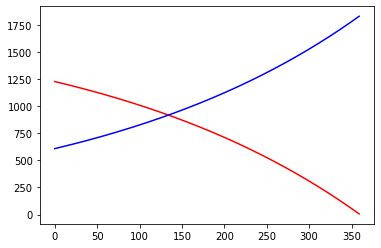

In [43]:
# Loop through each mortgage payment period
for i in range(0, mortgage_payment_periods):
    
# Handle the case for the first iteration
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i-1]
        
    # Calculate the interest based on the previous principal
    interest_payment = round(previous_principal_remaining*mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment - interest_payment, 2)
    
    # Catch the case where all principal is paid off in the final period
    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining
        
    # Collect the historical values
    interest_paid[i] = interest_payment
    principal_paid[i] = principal_payment
    principal_remaining[i] = previous_principal_remaining - principal_payment
    
    
# Plot the interest vs principal
plt.plot(interest_paid, color="red")
plt.plot(principal_paid, color="blue")
#plt.legend(handles=[interest_plot, principal_plot], loc=2)
plt.show()

## Cumulative Payments and Home Equity
You are faithfully paying your mortgage each month, but it's difficult to tell how much of the house you actually own and how much interest you have paid in total over the years.

Use np.cumsum() to add up all the interest payments and also to add up all the principal payments over time to see how your ownership changes over time.

Recall that np.cumsum() performs a cumulative sum over time. Return a series of iterative sums instead of just a single number.

principal_paid, interest_paid, home_value and down_payment_percent from the previous exercise are available.

[0.50076148 0.5015253  0.50229146 0.50305999 0.50383086 0.50460411
 0.50537974 0.50615775 0.50693815 0.50772095 0.50850615 0.50929376
 0.5100838  0.51087626 0.51167116 0.5124685  0.51326829 0.51407054
 0.51487525 0.51568244 0.5164921  0.51730425 0.5181189  0.51893605
 0.51975571 0.52057789 0.52140259 0.52222983 0.5230596  0.52389193
 0.52472681 0.52556426 0.52640429 0.5272469  0.5280921  0.52893989
 0.52979029 0.5306433  0.53149894 0.5323572  0.5332181  0.53408164
 0.53494784 0.5358167  0.53668823 0.53756242 0.53843931 0.5393189
 0.54020119 0.54108619 0.5419739  0.54286435 0.54375754 0.54465346
 0.54555214 0.54645358 0.54735779 0.54826478 0.54917455 0.55008713
 0.5510025  0.55192069 0.5528417  0.55376554 0.55469221 0.55562174
 0.55655411 0.55748936 0.55842748 0.55936847 0.56031236 0.56125915
 0.56220885 0.56316146 0.56411701 0.5650755  0.56603693 0.5670013
 0.56796864 0.56893895 0.56991225 0.57088854 0.57186782 0.57285012
 0.57383544 0.57482378 0.57581515 0.57680957 0.57780705 0.578807

NameError: name 'interest_plot' is not defined

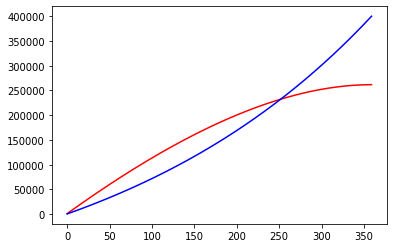

In [44]:
import numpy as np

# Calculate the cumulative home equity (principal) over time
cumulative_home_equity = np.cumsum( principal_paid)

# Calculate the cumulative interest paid over time
cumulative_interest_paid = np.cumsum(interest_paid)

# Calculate your percentage home equity over time
cumulative_percent_owned = down_payment_percent+ (cumulative_home_equity/home_value)
print(cumulative_percent_owned)

# Plot the cumulative interest paid vs equity accumulated
plt.plot(cumulative_interest_paid, color='red')
plt.plot(cumulative_home_equity, color='blue')
plt.legend(handles=[interest_plot, principal_plot], loc=2)
plt.show()

## Rising Housing Prices
Home values have been rising steadily each year, and this is a rather large investment for you.

Calculate your home equity value over time given a steady growth rate of 0.25% per month. A repeated array of this growth rate (with a length equal to the number of mortgage payment periods) is already stored for you in an object called growth_array.

The home_value and cumulative_percent_owned variables from the previous exercise are available.

In [45]:
growth_array = np.ones(mortgage_payment_periods)*0.0025

NameError: name 'homevalue_plot' is not defined

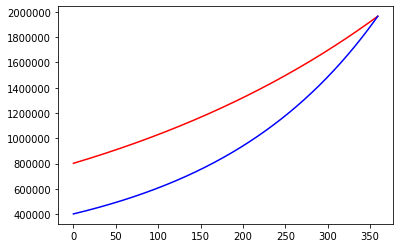

In [46]:
import numpy as np

# Calculate the cumulative growth over time
cumulative_growth_forecast = np.cumprod(1 +growth_array)

# Forecast the home value over time
home_value_forecast = home_value * cumulative_growth_forecast

# Forecast the home equity value owned over time
cumulative_home_value_owned = cumulative_percent_owned * home_value_forecast

# Plot the home value vs equity accumulated
plt.plot(home_value_forecast, color='red')
plt.plot(cumulative_home_value_owned, color='blue')
plt.legend(handles=[homevalue_plot, homeequity_plot], loc=2)
plt.show()

## Falling Housing Prices and Underwater Mortgages
Unfortunately, you are also well aware that home prices don't always rise.

An underwater mortgage is when the remaining amount you owe on your mortgage is actually higher than the value of the house itself.

In this exercise, you will calculate the worst case scenario where home prices drop steadily at the rate of 0.45% per month. To speed things up, the cumulative drop in home prices has already been forecasted and stored for you in a variable called cumulative_decline_forecast, which is an array of multiplicative discount factors compared to today's price - no need to add 1 to the rate array.

The outstanding principal on the mortgage is available as principal_remaining.

In [48]:
decline_array = np.ones(mortgage_payment_periods)*-0.0045

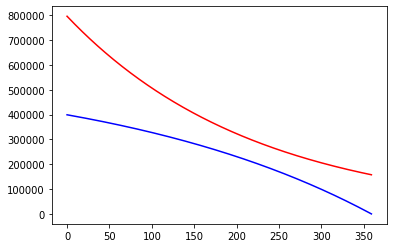

In [50]:
import numpy as np
import pandas as pd

# Cumulative drop in home value over time as a ratio
cumulative_decline_forecast = np.cumprod(1+decline_array)

# Forecast the home value over time
home_value_forecast = home_value * cumulative_decline_forecast

# Find all periods where your mortgage is underwater
underwater = principal_remaining > home_value_forecast
pd.value_counts(underwater)

# Plot the home value vs principal remaining
plt.plot(home_value_forecast, color='red')
plt.plot(principal_remaining, color='blue')
#plt.legend(handles=[homevalue_plot, principal_plot], loc=2)
plt.show()

# Chapter 4

Salary and Taxes
You just got a new job as an entry-level Data Scientist at a technology company in New York City with a decent starting salary of $85,000 per year.

Unfortunately, after state and local taxes, you can expect to be sending roughly 30 % back to the government each year.

You will need to calculate your monthly take home pay after taxes in order to begin budgeting.

In [51]:
# Enter your annual salary
salary = 85000

# Assume a tax rate of 30%
tax_rate = 0.3

# Calculate your salary after taxes
salary_after_taxes = salary * (1-tax_rate)
print("Salary after taxes: " + str(round(salary_after_taxes, 2)))

# Calculate your monthly salary after taxes
monthly_takehome_salary = salary_after_taxes/12
print("Monthly takehome salary: " + str(round(monthly_takehome_salary, 2)))

Salary after taxes: 59500.0
Monthly takehome salary: 4958.33


## Monthly Expenses and Savings
In order to make it in New York City, you have decided to split a two-bedroom apartment with a friend. You will have to budget for rent, food and entertainment, but it's also a good idea to allocate an amount for unforeseen expenses each month. This unforeseen expenses budget could be used for anything ranging from new clothes or electronics to doctor appointments.

Set up your monthly budget as follows:

Rent: $ 1200 / month (Includes utilities)

Food: $ 30 / day (On average. Includes groceries and eating out.)

Entertainment: $ 200 / month (Movies, drinks, museums, parties...)

Unforeseen Expenses: 250 / month (Stay safe, and don't drop your phone!)

For this application, assume an average of 30 days per month. Whatever is left after your paying your monthly expenses will go into your savings account each month.

monthly_takehome_salary from the previous exercise is available.

In [52]:
# Enter your monthly rent
monthly_rent = 1200

# Enter your daily food budget
daily_food_budget = 30

# Calculate your monthly food budget assuming 30 days per month
monthly_food_budget = daily_food_budget * 30

# Set your monthly entertainment budget
monthly_entertainment_budget = 200

# Allocate funds for unforeseen expenses, just in case
monthly_unforeseen_expenses = 250

# Next, calculate your total monthly expenses
monthly_expenses = monthly_food_budget + monthly_entertainment_budget + monthly_unforeseen_expenses + monthly_rent
print("Monthly expenses: " + str(round(monthly_expenses, 2)))

# Finally, calculate your monthly take-home savings
monthly_savings = monthly_takehome_salary - monthly_expenses
print("Monthly savings: " + str(round(monthly_savings, 2)))

Monthly expenses: 2550
Monthly savings: 2408.33


## Forecast Salary Growth and Cost of Living
Due to both inflation and increased productivity from experience, you can expect your salary to grow at different rates depending on your job. Now, since you are working in a growing and in-demand career field as a Data Scientist, you can assume a steady growth in your annual salary every year based on performance.

You can assume an annual salary growth rate of 5 %, which means if you start at $ 85,000 per year, you can expect to earn over $ 176,000 per year after 15 years. After taxes, assuming your tax rate hasn't changed, that works out to roughly $ 125,000 per year, which is not unreasonable for a Data Scientist. In fact, you might even make it to that level in a few years! But just to be safe, you should be conservative with your projections.

For this application, assume all inflation and salary growth happens in smaller increments on a monthly basis instead of just one large increase at the end of each year.

monthly_takehome_salary from the previous exercise is available.

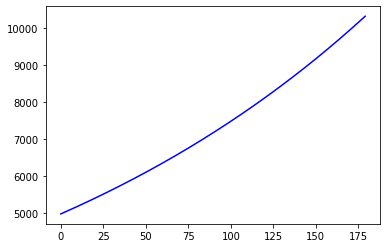

In [54]:
import numpy as np

# Create monthly forecasts up to 15 years from now
forecast_months = 12*15

# Set your annual salary growth rate
annual_salary_growth = 0.05

# Calculate your equivalent monthly salary growth rate
monthly_salary_growth = (1 +annual_salary_growth)**(1/12) - 1

# Forecast the cumulative growth of your salary
cumulative_salary_growth_forecast = np.cumprod(np.repeat(1 + monthly_salary_growth, forecast_months))

# Calculate the actual salary forecast
salary_forecast = cumulative_salary_growth_forecast * monthly_takehome_salary

# Plot the forecasted salary
plt.plot(salary_forecast, color='blue')
plt.show()

## Forecast Growing Expenses Due to Inflation
You will also assume your monthly expenses will rise by an average of 2.5% per year due to inflation. This will lead to higher cost of living over time, paying for the same expenses each year but at a higher price. Luckily, your salary is growing faster than inflation, which means you should have more money going into savings each month.

The monthly_expenses and forecast_months variables from the previous exercise are available.

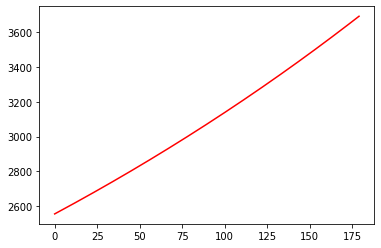

In [55]:
import numpy as np

# Set the annual inflation rate
annual_inflation = 0.025

# Calculate the equivalent monthly inflation rate
monthly_inflation = (1+annual_inflation)**(1/12) -1

# Forecast cumulative inflation over time
cumulative_inflation_forecast = np.cumprod(np.repeat(1 + monthly_inflation, forecast_months))

# Calculate your forecasted expenses
expenses_forecast = monthly_expenses * cumulative_inflation_forecast

# Plot the forecasted expenses
plt.plot(expenses_forecast, color='red')
plt.show()

## Calculate Your Net Worth
Now that you have forecasted your savings and salary over time while taking career progression and inflation into account, you have constructed a time-series which you can use to calculate your cash flows, just like in Chapter 1.

For this example, all you need to do is subtract your forecasted monthly expenses from your forecasted monthly salary. The remaining cash flow will go straight into your savings account for each month.

You want to project your cumulative savings over time to see how effective your budgeting process will be given your projections.

salary_forecast and expenses_forecast from the previous exercises are available.

Your final net worth: 762318.83


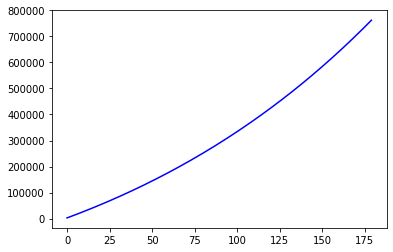

In [56]:
import numpy as np

# Calculate your savings for each month
savings_forecast = salary_forecast - expenses_forecast 

# Calculate your cumulative savings over time
cumulative_savings = np.cumsum(savings_forecast)

# Print the final cumulative savings after 15 years
final_net_worth = cumulative_savings[-1]
print("Your final net worth: " + str(round(final_net_worth, 2)))

# Plot the forecasted savings
plt.plot(cumulative_savings, color='blue')
plt.show()

## So You Want to Be a Millionaire?
Your projections show that you can accumulate over $700,000 in just 15 years by following a strict budget and growing your salary steadily over time.

But you want to be a millionaire in 15 years, retire young, sip margaritas and travel for the rest of your life. In order to do that, you're going to need to invest.

Remember the .pmt() function from numpy? You can use this function to calculate how much you need to save each month in order to accumulate your desired wealth over time.

You still have a lot to learn about the stock market, but your financial advisor told you that you can earn anywhere from 5-10% per year on your capital on average by investing in a low cost index fund.

You know that the stock market doesn't always go up, but you will assume a modest 7% return per year, which has been the average annual return in the US stock market from 1950-2009.

The forecast_months variable from the previous exercise is available.

In [57]:
import numpy as np

# Set the annual investment return to 7%
investment_rate_annual = 0.07

# Calculate the monthly investment return
investment_rate_monthly = (1 + investment_rate_annual)**(1/12) -1

# Calculate your required monthly investment to amass $1M
required_investment_monthly = np.pmt(rate=investment_rate_monthly, nper=15*12, pv=0, fv=-1000000)
print("You will have to invest $" + str(round(required_investment_monthly, 2)) + " per month to amass $1M over 15 years")

You will have to invest $3214.35 per month to amass $1M over 15 years


<ipython-input-57-c9b8028d1539>:10: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).
  required_investment_monthly = np.pmt(rate=investment_rate_monthly, nper=15*12, pv=0, fv=-1000000)


## Investing a Percentage of Your Income (I)
Unfortunately, you really can't afford to save $3,000 per month in order to amass $1,000,000 after only 15 years.

But what you can do is start slowly, investing a small percentage of your take-home income each month, which should grow over time as your income grows as well.

In this exercise, you will lay the foundations to simulate this investing process over time.

The salary_forecast and expenses_forecast variables are available from the previous exercise.

The cash_flow_forecast is also available, and is an array of your forecasted salary minus your forecasted expenses. The monthly_investment_percentage variable is already set to 0.30.

In [59]:
monthly_investment_percentage = 0.3
cash_flow_forecast = np.array([2423.27826769, 2438.29801669, 2453.38956001, 2468.55321198,
       2483.78928828, 2499.0981059 , 2514.47998316, 2529.93523974,
       2545.46419666, 2561.06717629, 2576.74450237, 2592.4965    ,
       2608.32349564, 2624.22581713, 2640.20379371, 2656.25775598,
       2672.38803595, 2688.59496702, 2704.87888401, 2721.24012312,
       2737.67902201, 2754.19591972, 2770.79115674, 2787.465075  ,
       2804.21801785, 2821.05033009, 2837.96235799, 2854.95444926,
       2872.02695308, 2889.1802201 , 2906.41460244, 2923.73045372,
       2941.12812902, 2958.60798494, 2976.17037957, 2993.8156725 ,
       3011.54422485, 3029.35639925, 3047.25255985, 3065.23307234,
       3083.29830395, 3101.44862345, 3119.68440115, 3138.00600895,
       3156.41382027, 3174.90821015, 3193.48955515, 3212.15823347,
       3230.91462486, 3249.75911068, 3268.6920739 , 3287.7138991 ,
       3306.82497245, 3326.02568177, 3345.31641652, 3364.69756776,
       3384.16952821, 3403.73269226, 3423.38745593, 3443.13421692,
       3462.97337459, 3482.90532997, 3502.93048581, 3523.04924651,
       3543.2620182 , 3563.5692087 , 3583.97122753, 3604.46848596,
       3625.06139697, 3645.75037528, 3666.53583733, 3687.41820134,
       3708.39788726, 3729.47531682, 3750.65091352, 3771.92510261,
       3793.29831117, 3814.77096803, 3836.34350385, 3858.01635108,
       3879.78994398, 3901.66471865, 3923.64111301, 3945.71956682,
       3967.90052167, 3990.18442102, 4012.5717102 , 4035.06283636,
       4057.65824859, 4080.35839781, 4103.16373686, 4126.07472047,
       4149.09180527, 4172.21544981, 4195.44611457, 4218.78426195,
       4242.2303563 , 4265.78486389, 4289.44825298, 4313.22099377,
       4337.10355843, 4361.09642111, 4385.20005797, 4409.41494712,
       4433.74156872, 4458.18040491, 4482.73193986, 4507.39665977,
       4532.17505287, 4557.06760945, 4582.07482184, 4607.19718443,
       4632.43519369, 4657.78934816, 4683.26014848, 4708.84809737,
       4734.55369967, 4760.37746232, 4786.31989439, 4812.38150709,
       4838.56281374, 4864.86432985, 4891.28657305, 4917.83006315,
       4944.49532215, 4971.28287422, 4998.19324572, 5025.22696521,
       5052.38456349, 5079.66657354, 5107.0735306 , 5134.60597214,
       5162.26443786, 5190.04946976, 5217.96161207, 5246.0014113 ,
       5274.16941625, 5302.46617804, 5330.89225006, 5359.44818802,
       5388.13454996, 5416.95189627, 5445.90078965, 5474.98179518,
       5504.19548028, 5533.54241476, 5563.02317079, 5592.63832297,
       5622.38844826, 5652.27412606, 5682.29593816, 5712.45446882,
       5742.75030472, 5773.18403499, 5803.75625122, 5834.46754748,
       5865.31852032, 5896.30976879, 5927.44189441, 5958.71550126,
       5990.1311959 , 6021.68958745, 6053.39128757, 6085.23691046,
       6117.2270729 , 6149.36239424, 6181.64349642, 6214.07100397,
       6246.64554402, 6279.36774635, 6312.23824334, 6345.25767001,
       6378.42666405, 6411.74586579, 6445.21591825, 6478.83746713,
       6512.61116081, 6546.53765039, 6580.61758969, 6614.85163525])

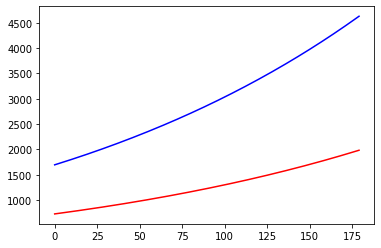

In [61]:
import numpy as np

# Calculate your monthly deposit into your investment account
investment_deposit_forecast = cash_flow_forecast * monthly_investment_percentage

# The rest goes into your savings account
savings_forecast_new = cash_flow_forecast * (1-monthly_investment_percentage)

# Calculate your cumulative savings over time
cumulative_savings_new = np.cumsum(savings_forecast_new)

# Plot your forecasted monthly savings vs investments
plt.plot(investment_deposit_forecast, color='red')
plt.plot(savings_forecast_new, color='blue')
#plt.legend(handles=[investments_plot, savings_plot], loc=2)
plt.show()

## Investing a Percentage of Your Income (II)
To finish up your investment simulation, you will need to loop through each time period, calculate the growth of any investments you have already made, add your new monthly deposit, and calculate your net worth at each point in time.

You can do it!

Cumulative savings (cumulative_savings_new) from the previous exercise is available, and investment_portfolio and net_worth are pre-allocated empty numpy arrays of length equal to forecast_months.

In [62]:
investment_portfolio = np.empty(forecast_months)
net_worth = np.empty(forecast_months)

In [63]:
import numpy as np

# Loop through each forecast period
for i in range(forecast_months):
    
    # Find the previous investment deposit amount
    if i == 0: 
        previous_investment = 0
    else:
        previous_investment = investment_portfolio[i-1]
        
    # Calculate the value of your previous investments, which have grown
    previous_investment_growth = previous_investment*(1 + investment_rate_monthly)
    
    # Add your new deposit to your investment portfolio
    investment_portfolio[i] =  previous_investment_growth + investment_deposit_forecast[i]
    
    # Calculate your net worth at each point in time
    net_worth[i] = investment_portfolio[i] + cumulative_savings_new[i]
         
# Plot your forecasted cumulative savings vs investments and net worth
plot_investments(investment_portfolio, cumulative_savings_new, net_worth)

## Inflation-Adjusted Net Worth
By saving 30% per year, your simulation shows that you can accumulate $896,962.66. Not quite a millionaire, but not bad at all!

For the sake of simplicity, let's assume you were able to save $900,000 by following your budget.

But what if you retire 15 years from now? What is $900,000 going to be truly worth 15 years from now?

In [65]:
import numpy as np

# Set your future net worth
future_net_worth = 900000

# Set the annual inflation rate to 2.5%
annual_inflation = 0.025

# Calculate the present value of your terminal wealth over 15 years
inflation_adjusted_net_worth = np.pv(rate=annual_inflation, nper=15 , pmt=0, fv=-1*future_net_worth)
print("Your inflation-adjusted net worth: $" + str(round(inflation_adjusted_net_worth, 2)))

Your inflation-adjusted net worth: $621419.0


<ipython-input-65-b9bc35e86c23>:10: DeprecationWarning: numpy.pv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pv instead (https://pypi.org/project/numpy-financial/).
  inflation_adjusted_net_worth = np.pv(rate=annual_inflation, nper=15 , pmt=0, fv=-1*future_net_worth)
